In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve

In [3]:
cancer = load_breast_cancer()

In [4]:
X = cancer.data
y = cancer.target

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [18]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

[learning_curve] Training set sizes: [  5  15  25  36  46  56  67  77  87  98 108 118 129 139 149 159 170 180
 190 201 211 221 232 242 252 263 273 283 294 304 314 325 335 345 356 366
 376 387 397 407 418 428 438 449 459 469 480 490 500 511]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished


In [19]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 1.        , 0.984     , 0.99444444, 0.98913043,
       0.99464286, 0.99850746, 1.        , 0.99195402, 0.99285714,
       0.99537037, 0.99661017, 0.99689922, 0.99640288, 0.99194631,
       0.99685535, 0.99647059, 0.99388889, 0.99736842, 0.99651741,
       0.9943128 , 0.9959276 , 0.99741379, 0.99752066, 0.9952381 ,
       0.99505703, 0.99413919, 0.995053  , 0.99557823, 0.99736842,
       0.99649682, 0.99723077, 0.99850746, 0.99826087, 0.99719101,
       0.99644809, 0.99654255, 0.99844961, 0.99697733, 0.9970516 ,
       0.99808612, 0.99813084, 0.99748858, 0.99732739, 0.99847495,
       0.99829424, 0.998125  , 0.99755102, 0.9978    , 0.99863014])

In [20]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.        , 0.01959592, 0.01111111, 0.01086957,
       0.00818317, 0.00447761, 0.        , 0.01155158, 0.00796964,
       0.0062113 , 0.00415168, 0.00514205, 0.00359712, 0.00585087,
       0.00314465, 0.00470588, 0.0052411 , 0.00263158, 0.00318563,
       0.00413166, 0.00426877, 0.00285916, 0.00274101, 0.00427394,
       0.00418251, 0.00407895, 0.00551961, 0.00306122, 0.00197368,
       0.00361714, 0.00255588, 0.00200245, 0.00192268, 0.00217583,
       0.00125207, 0.00292553, 0.00236826, 0.00314609, 0.00214197,
       0.00278993, 0.00228924, 0.00278688, 0.0013363 , 0.00139502,
       0.00127932, 0.00173055, 0.00237998, 0.00274955, 0.00152842])

In [21]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.3725726 , 0.3725726 , 0.70849862, 0.73513309, 0.68332901,
       0.82228416, 0.84851136, 0.84650851, 0.86078991, 0.89982823,
       0.9050309 , 0.92094568, 0.92257584, 0.92614835, 0.91565228,
       0.92263957, 0.92639465, 0.91016874, 0.93692205, 0.93507584,
       0.9439115 , 0.92429997, 0.9297511 , 0.94726687, 0.93507692,
       0.92802696, 0.93322855, 0.93871208, 0.94218628, 0.9455449 ,
       0.94563456, 0.9542855 , 0.93492136, 0.95086855, 0.94560431,
       0.94732953, 0.95256352, 0.94052588, 0.93516982, 0.96155151,
       0.95447131, 0.95447023, 0.94920815, 0.95616412, 0.95083722,
       0.96333722, 0.94923732, 0.94926865, 0.95607229, 0.96490688])

In [22]:
test_std = np.std(test_scores, axis = 1)
test_std

array([0.00441189, 0.00441189, 0.14690721, 0.12673749, 0.09312936,
       0.05799366, 0.0559383 , 0.07731041, 0.05553048, 0.0326547 ,
       0.04290855, 0.03586549, 0.05484747, 0.02702739, 0.02309473,
       0.04139558, 0.03621553, 0.04849421, 0.03712553, 0.04185221,
       0.04108176, 0.05544987, 0.03012427, 0.02078059, 0.03577617,
       0.03241971, 0.03089867, 0.03485592, 0.03937526, 0.03001246,
       0.035292  , 0.022557  , 0.04037858, 0.03641704, 0.03163561,
       0.03011565, 0.0294664 , 0.03555096, 0.03957586, 0.02871154,
       0.02699798, 0.03026495, 0.02836402, 0.02925531, 0.02782232,
       0.03043998, 0.03225392, 0.02921092, 0.02745007, 0.03018435])

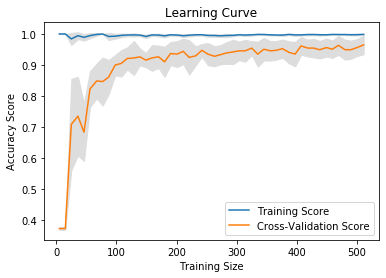

In [23]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')



plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')